In [4]:
import numpy as np
import pandas as pd

In [5]:
#Import Data
df = pd.read_csv('car_price_prediction.csv')
df

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Audi,2020,2.4,Petrol,Automatic,22650,Like New,61384.10,Q5
2496,2497,Audi,2001,5.7,Hybrid,Manual,77701,Like New,24710.35,A3
2497,2498,Ford,2021,1.1,Hybrid,Manual,272827,Like New,29902.45,Fiesta
2498,2499,Audi,2002,4.5,Diesel,Manual,229164,Like New,46085.67,Q5


In [6]:
df.drop(columns='Car ID' , inplace=True)

In [7]:
#Exploratory Data Analysis

In [8]:
df['Brand'].value_counts().sort_index()

Brand
Audi        368
BMW         358
Ford        347
Honda       352
Mercedes    353
Tesla       348
Toyota      374
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

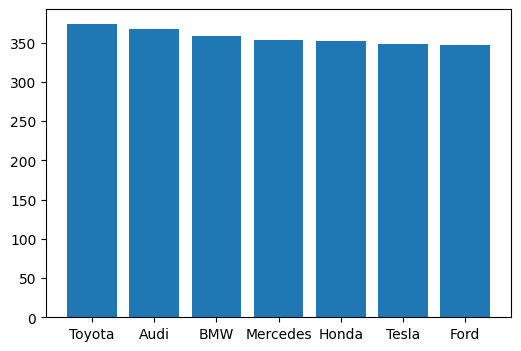

In [10]:
plt.figure(figsize=(6,4))
plt.bar(x=df['Brand'].value_counts().index, height=df['Brand'].value_counts().values)
plt.show()

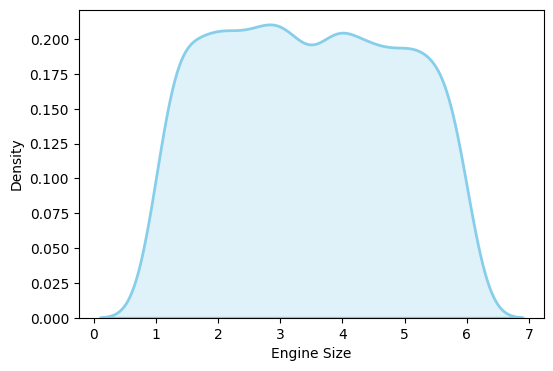

In [11]:
plt.figure(figsize=(6, 4))
sns.kdeplot(df['Engine Size'], fill=True, color='skyblue', linewidth=2)
plt.show()

In [12]:
df['Fuel Type'].value_counts()

Fuel Type
Diesel      655
Petrol      630
Electric    614
Hybrid      601
Name: count, dtype: int64

<BarContainer object of 4 artists>

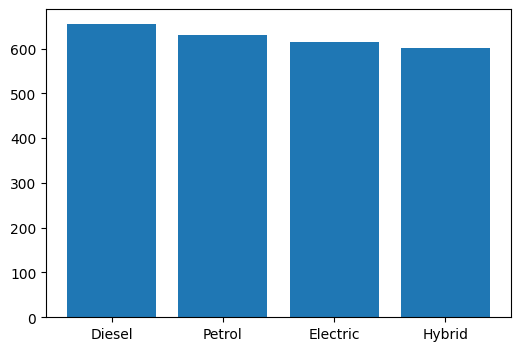

In [13]:
plt.figure(figsize=(6,4))
plt.bar(x= df['Fuel Type'].value_counts().index,height=df['Fuel Type'].value_counts().values)

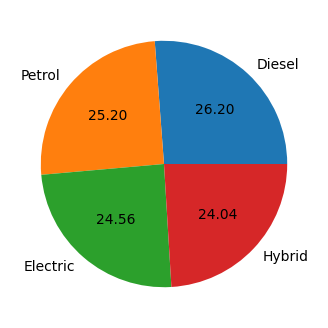

In [14]:
plt.figure(figsize=(6,4))
plt.pie(df['Fuel Type'].value_counts(), autopct="%1.2f", labels=df['Fuel Type'].value_counts().index)
plt.show()

In [15]:
df['Transmission'].value_counts()

Transmission
Manual       1308
Automatic    1192
Name: count, dtype: int64

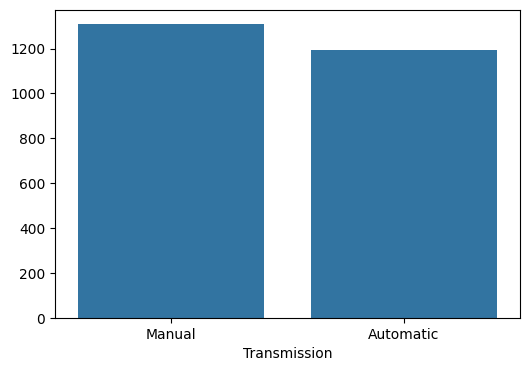

In [16]:
plt.figure(figsize=(6,4))
bar = sns.barplot(x=df['Transmission'].value_counts().index,y=df['Transmission'].value_counts().values)
plt.show()

In [17]:
df['Condition'].value_counts()

Condition
Used        855
Like New    836
New         809
Name: count, dtype: int64

C:\Users\SHILPA CHOWNI\AppData\Local\Temp\ipykernel_17812\7290251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=df['Condition'].value_counts().index,y=df['Condition'].value_counts().values,palette=['skyblue', 'yellow', 'lightgreen'])


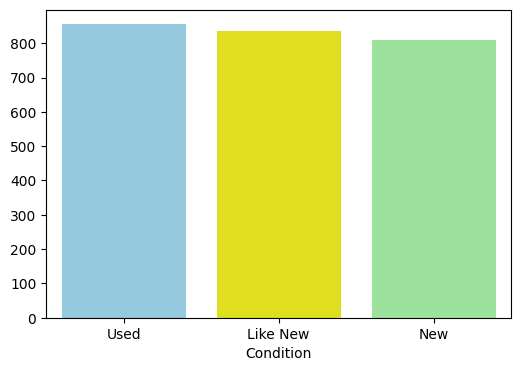

In [18]:
plt.figure(figsize=(6,4))
bar = sns.barplot(x=df['Condition'].value_counts().index,y=df['Condition'].value_counts().values,palette=['skyblue', 'yellow', 'lightgreen'])
plt.show()

In [19]:
df['Price'].mean()

np.float64(52638.022532)

In [20]:
df['Model'].value_counts()

Model
Fiesta      103
Corolla     103
A3           98
A4           96
Q7           95
CR-V         95
Model X      93
5 Series     93
Prius        93
3 Series     93
X3           92
GLA          92
C-Class      92
Camry        90
Model Y      89
E-Class      89
Fit          89
Accord       88
RAV4         88
Model 3      87
Explorer     86
Focus        81
Civic        80
X5           80
GLC          80
Q5           79
Model S      79
Mustang      77
Name: count, dtype: int64

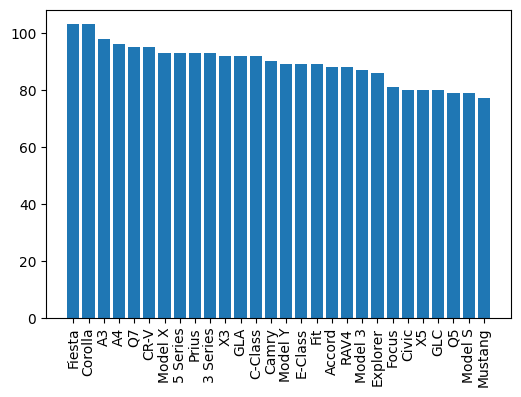

In [21]:
plt.figure(figsize=(6,4))
plt.bar(x=df['Model'].value_counts().index,height=df['Model'].value_counts().values)
plt.xticks(rotation=90)
plt.show()

In [19]:
# DATA Preprocessing

In [ ]:
#Data Encoding

In [22]:
# 🔹 Improved Encoding using pd.get_dummies (One-Hot Encoding)

# Make a copy of the original dataframe before encoding
df_encoded = df.copy()

# Drop high-cardinality column 'Model' (optional, or use target encoding later)
df_encoded = df_encoded.drop(columns=['Model'])

# Derive new feature: Car Age
df_encoded['Car_Age'] = 2025 - df_encoded['Year']
df_encoded = df_encoded.drop(columns=['Year'])

# One-Hot Encode categorical features
df_encoded = pd.get_dummies(
    df_encoded, 
    columns=['Brand', 'Fuel Type', 'Transmission', 'Condition'], 
    drop_first=True  # avoids dummy variable trap
)

# Define features and target
X = df_encoded.drop(columns='Price')
Y = df_encoded['Price']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42
)

print("✅ Encoding complete. Shape of training set:", X_train.shape)

✅ Encoding complete. Shape of training set: (1750, 15)


In [23]:
# 🔹 Feature Engineering: Add Car Age

# Create a new column 'Car_Age' from the Year
df['Car_Age'] = 2025 - df['Year']

# Drop the original 'Year' column since Car_Age is more meaningful
df = df.drop(columns=['Year'])

print("✅ Feature Engineering complete. Added 'Car_Age'.")
df[['Car_Age', 'Mileage', 'Engine Size', 'Price']].head()

✅ Feature Engineering complete. Added 'Car_Age'.


,Car_Age,Mileage,Engine Size,Price
0,9,114832,2.3,26613.92
1,7,143190,4.4,14679.61
2,12,181601,4.5,44402.61
3,14,68682,4.1,86374.33
4,16,223009,2.6,73577.10


In [31]:
df.head()

,Brand,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model,Car_Age
0,Tesla,2.3,Petrol,Manual,114832,New,26613.92,Model X,9
1,BMW,4.4,Electric,Manual,143190,Used,14679.61,5 Series,7
2,Audi,4.5,Electric,Manual,181601,New,44402.61,A4,12
3,Tesla,4.1,Diesel,Automatic,68682,New,86374.33,Model Y,14
4,Ford,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang,16


In [32]:
df.to_csv('new_carpred.csv')
print("Converted to csv file")

Converted to csv file
